### Import Library 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Preparing Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/KUxDEPA-Data-Science-and-Machine-Learning-Training-Course/dataset/03-cities.csv',encoding='tis620')

In [26]:
#slice column
df = df.iloc[:,:5]

In [27]:
X = df[['latitude','longitude']]

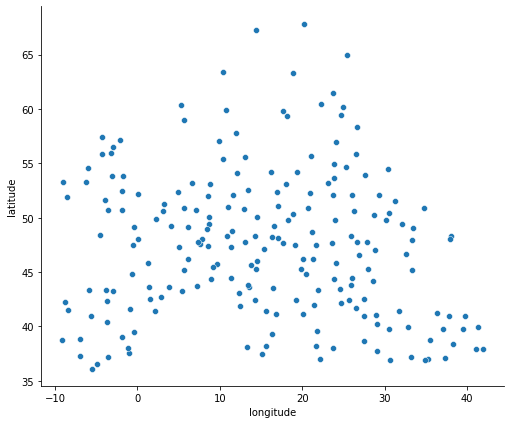

In [28]:
#plot data
sns.relplot(data=df,x='longitude',y='latitude',height=6,aspect=1.2)

##K-mean Clustering

### Import Kmeans

In [29]:
from sklearn.cluster import KMeans

### Create model

In [30]:
km_cluster = KMeans(8)

### Fit Model

In [31]:
km_cluster.fit(X)

KMeans()

###Labels Result

In [32]:
km_cluster.labels_

array([3, 6, 4, 7, 1, 1, 3, 3, 5, 1, 6, 7, 2, 5, 2, 3, 0, 1, 0, 0, 1, 5,
       3, 7, 6, 5, 3, 3, 3, 0, 3, 0, 1, 6, 6, 4, 5, 3, 1, 0, 6, 6, 1, 2,
       5, 3, 6, 0, 5, 3, 2, 5, 2, 1, 2, 4, 5, 6, 6, 1, 5, 3, 0, 0, 0, 0,
       2, 6, 5, 2, 0, 5, 2, 3, 6, 6, 6, 2, 2, 4, 3, 7, 7, 2, 6, 5, 3, 3,
       6, 7, 3, 3, 6, 4, 1, 5, 3, 3, 5, 3, 4, 7, 0, 1, 3, 3, 6, 2, 2, 7,
       3, 0, 7, 0, 0, 0, 4, 4, 5, 4, 0, 0, 6, 3, 1, 5, 1, 5, 0, 3, 1, 3,
       7, 7, 3, 2, 1, 3, 0, 5, 3, 3, 0, 1, 3, 1, 3, 2, 5, 3, 7, 0, 4, 5,
       4, 1, 5, 2, 1, 5, 5, 0, 2, 2, 5, 5, 5, 3, 4, 5, 0, 5, 3, 2, 1, 5,
       7, 1, 5, 2, 7, 7, 2, 5, 2, 3, 4, 0, 6, 5, 4, 4, 7, 4, 2, 1, 7, 5,
       2, 4, 4, 4, 1, 5, 1, 0, 0, 5, 7, 1, 0, 7, 3], dtype=int32)

### Plot Labels

In [33]:
kmc_s = pd.Series(km_cluster.labels_, name='kmean', dtype='category')

In [34]:
df['kmean'] = kmc_s

In [35]:
df

,city,country,latitude,longitude,temperature,kmean
0,Aalborg,Denmark,57.03,9.92,7.52,3
1,Aberdeen,United Kingdom,57.17,-2.08,8.10,6
2,Abisko,Sweden,63.35,18.83,0.20,4
3,Adana,Turkey,36.99,35.32,18.67,7
4,Albacete,Spain,39.00,-1.87,12.62,1
...,...,...,...,...,...,...
208,Yevpatoriya,Ukraine,45.20,33.36,10.02,7
209,Zaragoza,Spain,41.65,-0.89,14.17,1
210,Zhytomyr,Ukraine,50.25,28.66,6.67,0
211,Zonguldak,Turkey,41.43,31.78,10.64,7


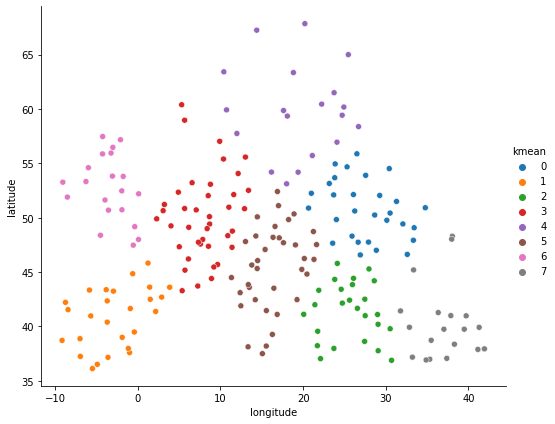

In [36]:
sns.relplot(data=df,x='longitude',y='latitude',hue='kmean',height=6,aspect=1.2)

###Finding Group Centroid

In [37]:
km_cluster.cluster_centers_

array([[50.7462069 , 27.53034483],
       [40.85923077, -2.78538462],
       [41.388     , 25.6692    ],
       [50.13384615,  8.05435897],
       [59.88789474, 19.42157895],
       [45.40583333, 16.34138889],
       [52.722     , -3.39      ],
       [40.35052632, 37.02210526]])

In [38]:
center_df = pd.DataFrame(km_cluster.cluster_centers_,columns=['latitude', 'longitude'])
center_df

,latitude,longitude
0,50.746207,27.530345
1,40.859231,-2.785385
2,41.388000,25.669200
3,50.133846,8.054359
4,59.887895,19.421579
5,45.405833,16.341389
6,52.722000,-3.390000
7,40.350526,37.022105


In [39]:
center_df.columns = ['lat','long']

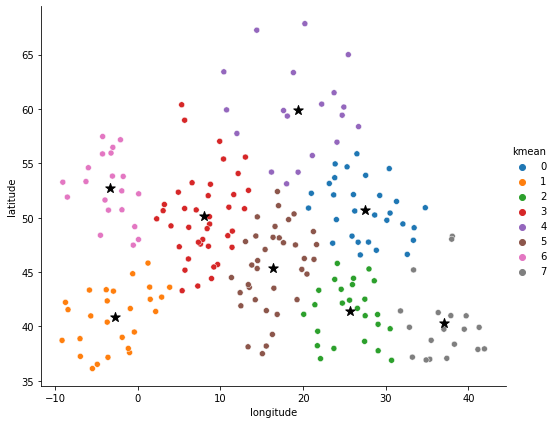

In [41]:
sns.relplot(data=df,x='longitude',y='latitude',hue='kmean',height=6,aspect=1.2)
plt.scatter(x=center_df['long'],y=center_df['lat'],marker='*',s=100,color='black')

##K-mean Performance Evaluation

###Finding best Inertia

In [42]:
km_cluster.inertia_

4672.321480633781

In [47]:
km_inertia = KMeans(n_clusters=8,n_init=1000)

In [48]:
km_inertia.fit(X)

KMeans(n_init=1000)

In [49]:
km_inertia.inertia_

4666.063630315226

###Finding best value of K

In [50]:
results = []
for k in range(2,12) : 
  km = KMeans(k,n_init=100)
  km.fit(X)
  results.append((k,km.inertia_))

In [53]:
results_df = pd.DataFrame(results,columns=['k','inertia'])
results_df

,k,inertia
0,2,19930.716255
1,3,13444.301258
2,4,10253.710150
3,5,8201.426890
4,6,6604.002814
5,7,5412.175552
6,8,4671.177251
7,9,4007.328305
8,10,3460.324055
9,11,3091.257635


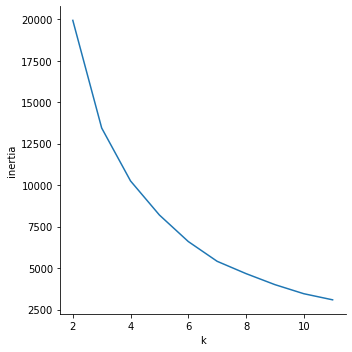

In [55]:
sns.relplot(data=results_df,x='k',y='inertia',kind='line')

###Silhouette coefficient

In [56]:
from sklearn.metrics import silhouette_score

In [57]:
results = []
for k in range(2,12) : 
  km = KMeans(k,n_init=100)
  km.fit(X)
  results.append((k,km.inertia_,silhouette_score(X,km.labels_)))

In [58]:
results

[(2, 19930.716255352414, 0.46249103668837904),
 (3, 13444.301257929612, 0.3856350026236928),
 (4, 10246.238061963883, 0.3812504363053932),
 (5, 8201.426889619484, 0.36381857133536355),
 (6, 6604.77405214174, 0.37599651555949526),
 (7, 5415.353501545142, 0.37911870104775097),
 (8, 4666.063630315226, 0.3810816555341402),
 (9, 4009.7688566867578, 0.3920044846047561),
 (10, 3460.324054973898, 0.41482025183826454),
 (11, 3091.7820973321113, 0.396567682506175)]

In [59]:
results_df = pd.DataFrame(results,columns=['k','inertia','silhouette_score'])
results_df

,k,inertia,silhouette_score
0,2,19930.716255,0.462491
1,3,13444.301258,0.385635
2,4,10246.238062,0.381250
3,5,8201.426890,0.363819
4,6,6604.774052,0.375997
5,7,5415.353502,0.379119
6,8,4666.063630,0.381082
7,9,4009.768857,0.392004
8,10,3460.324055,0.414820
9,11,3091.782097,0.396568


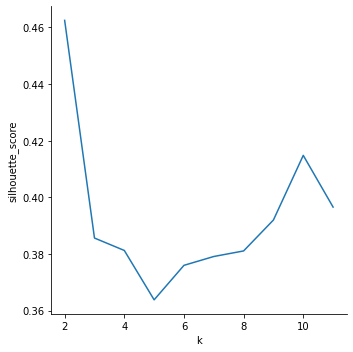

In [62]:
sns.relplot(data=results_df,x='k',y='silhouette_score',kind='line')

##DBSCAN

In [65]:
from sklearn.cluster import DBSCAN

In [104]:
dbs = DBSCAN(eps=2.32,min_samples=4)

In [105]:
dbs.fit(X)

DBSCAN(eps=2.32, min_samples=4)

In [106]:
dbs.labels_

array([-1,  0, -1,  1,  2,  3,  4,  4,  4,  5,  0, -1, -1,  4,  8,  4,  4,
        3,  4,  4,  5,  4,  4,  1,  0,  4,  4, -1,  4,  6,  4,  7,  2,  0,
        0, -1,  4,  4, -1,  4,  0,  0, -1,  4,  4,  4, -1,  6,  4,  4,  4,
        4,  4,  2,  4,  4,  4,  0,  0,  2,  4,  4,  7,  7,  4,  4,  4, -1,
        4,  4,  6,  4, -1,  4, -1,  0,  0,  4,  4,  4,  4,  1,  1,  4,  0,
        4,  4,  4, -1,  1,  4,  4,  0, -1,  3,  4,  4,  4,  4,  4,  9, -1,
        6,  3,  4,  4,  0,  4,  8,  1,  4,  6,  1,  7,  4,  7, -1, -1,  4,
        4,  7,  7,  0,  4,  5,  4, -1,  4,  4,  4,  2,  4, -1,  1,  4,  4,
        3,  4,  7,  4,  4,  4, -1,  4,  4,  2,  4,  4,  4,  4,  1, -1, -1,
        4, -1,  2,  4,  8,  5,  4,  4, -1,  4,  4,  4,  4,  4,  4,  6,  4,
       -1,  4,  4,  4,  2,  4,  1,  2,  4,  4,  1,  1,  4,  4,  4, -1, -1,
        7,  0,  4,  9,  9,  1,  9,  4,  5,  1,  4,  4, -1,  9, -1,  2,  4,
       -1,  6,  4,  4, -1,  2,  7,  4,  4])

In [107]:
df['dbscan'] = pd.Series(dbs.labels_,dtype='category')

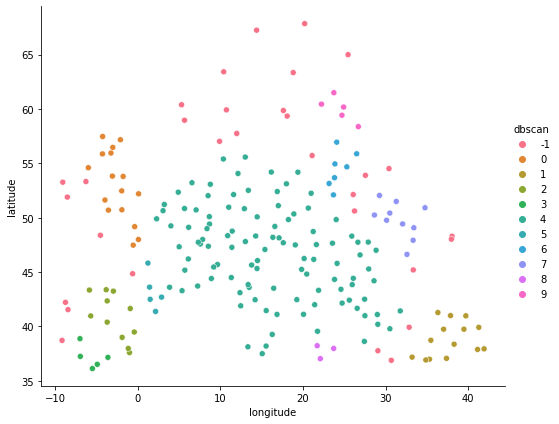

In [108]:
sns.relplot(data=df,x='longitude',y='latitude',hue='dbscan',height=6,aspect=1.2)

##Measuring performance

In [109]:
from sklearn.metrics import silhouette_samples

In [110]:
silhouette_samples(X,dbs.labels_)

array([-0.20814483,  0.65320064, -0.64443356,  0.68693647,  0.23831556,
        0.67141262, -0.58310662, -0.40780219,  0.18637101,  0.65591195,
       -0.22666361, -0.79029635, -0.72073457, -0.06185745,  0.85325325,
        0.14821736, -0.51029781,  0.43860599, -0.32756638, -0.64680788,
        0.55800753, -0.3157048 , -0.30055726,  0.71759654,  0.64060692,
       -0.17095003, -0.12525059, -0.41934607,  0.1264826 ,  0.65459816,
       -0.00145675,  0.64116568,  0.31293253,  0.65407519,  0.70544133,
       -0.39738005,  0.05938866, -0.19258144, -0.85845259, -0.53735599,
        0.52828206,  0.6840455 , -0.81475089, -0.53019496,  0.15916091,
        0.01173805, -0.75698378,  0.62389227,  0.12102413, -0.54100004,
       -0.35562881,  0.04131563, -0.47820907,  0.46368482, -0.54199308,
       -0.35263909, -0.23765765,  0.18675079,  0.52410943,  0.08195632,
       -0.38251503,  0.24946522,  0.7311555 ,  0.61885281, -0.48287759,
       -0.67938404, -0.51367549, -0.73694006, -0.40148021, -0.35